In [1]:
import sys

sys.path.append('..')
sys.path

['/home/jupyter/CV_Project/ie590_project/jupyter_notebook_nonGIT',
 '/opt/anaconda3/lib/python37.zip',
 '/opt/anaconda3/lib/python3.7',
 '/opt/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/opt/anaconda3/lib/python3.7/site-packages',
 '/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/home/jupyter/.ipython',
 '..']

In [2]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage.transform import resize
import math

In [3]:
tf.__version__

'2.0.0-rc2'

In [4]:
from ie590_project_nonGIT.model.input_fn import input_fn,input_fn_features
from ie590_project_nonGIT.utils.utils import Params
params = Params('params.json')
is_training = False

# How to load and iterate through FRAME IMAGE Dataset:

In [5]:
# "inputs" from the input_fn will return the first batch of data
inputs = input_fn(is_training,params)
#Demonstrating the pipeline for the first batch
x_sample = inputs['images']
y_sample = inputs['targets']

In [6]:
y_sample

<tf.Tensor: id=50, shape=(1,), dtype=int64, numpy=array([0])>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


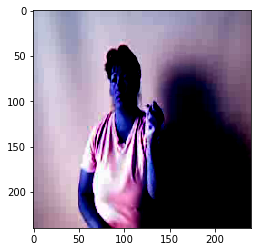

In [8]:
plt.imshow(x_sample[0][10][:,:,:3])

In [ ]:
#TO GET THE NEXT BATCH
x_sample, y_sample = inputs['iterator'].get_next()

In [37]:
#Demonstrating the second batch
y_sample

<tf.Tensor: id=379, shape=(10, 5), dtype=int64, numpy=
array([[0, 0, 1, 1, 1],
       [0, 1, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 1, 1],
       [0, 1, 1, 1, 1],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 1, 0, 0]])>

In [ ]:
plt.imshow(x_sample[7][10][:,:,:3])

In [ ]:
#to get the batches, you can just do inputs['iterator'].get_next() in a for loop.

# How to load and iterate through FEATURE MAP Dataset:

In [11]:
inputs = input_fn_features(is_training,params)
#Demonstrating the pipeline for the first batch
x_sample = inputs['features'] #Feature Map
y_sample = inputs['targets'] #Descriptor Label

Note that the feature maps are returned in the shape (N,C,Frames,Features).
N = Number of Videos. Will be equal to params.batch_size
C = Size 2 (means it will return 2 options). First option is for RGB features, Second option is for Depth features.
Frames = will be equal to max_frames
Features = Size 512 for VGG16

In [12]:
#Overall Shape
x_sample.shape

TensorShape([1, 2, 25, 512])

In [14]:
#To Pass RGB Features into LSTM, do this:
x_sample[:,0,:,:].shape
#The below shape shows 1 video samples, 25 frames, 512 features

TensorShape([1, 25, 512])

### To use the batch iterator do the same as before: 
inputs['iterator'].get_next() in a for loop.